## A list of steps involved in creation of Neural Network

This notebook contains functions that create neural network layers, define activation functions, show summary of our layers etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This notebook uses the Keras interface of Tensorflow machine learning package.  
Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow.

In [ ]:
import tensorflow as tf

#get functions that will be used to creare network layers
from tensorflow.keras.layers import Dense, Input
#get functions to create a Sequential model
from tensorflow.keras import Sequential
#get functions to measure metrics
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
#get activation functions
from tensorflow.keras.activations import sigmoid

In [2]:
#data
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

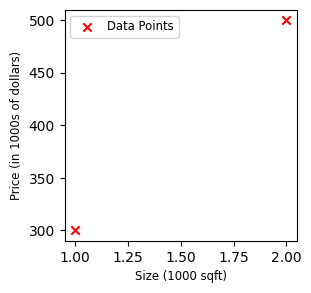

In [8]:
fig, ax = plt.subplots(1,1, figsize = (3,3))
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='small')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='small')
ax.set_xlabel('Size (1000 sqft)', fontsize='small')
plt.show()

### Define Neural Network Layer

Both linear and sigmoid activation layers created below contain only 1 unit.

#### 1. Linear Layer

In [ ]:
linear_layer = tf.keras.layers.Dense(units = 1, activation = 'linear',)

#### 2. Logistic Layer

In [ ]:
log_layer = tf.keras.layers.Dense(units = 1, activation = 'sigmoid',)

### Fetch weights present in the layers

Since no weights have been explicity assigned to the units so far, following code will return empty lists.  
There are 2 ways to add weight parameters.  
    - use **`.set_weights()`** function to explicitly set your desired weights. OR  
    - run the model with your training data. The model will automatically instantiate weights in the layers.

In [ ]:
#function to get weights
linear_layer.get_weights()
log_layer.get_weights()

In [ ]:
#reshape() converts the 1st row of xtrain to 2-D type because tensorflow layers accept 2-D data.
a1 = linear_layer(X_train[0].reshape(1,-1))
print(a1)

`print(a1)` returns y value computed by the model.

In [ ]:
#now get the weights created by model
linear_layer.get_weights()
print(f"w= {w}, b = {b}")

In [ ]:
#Set own values of w and b 
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

### Making predictions from trained layer

In [ ]:
predictions = linear_layer(X_test)

## Logistic Layer

In [9]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

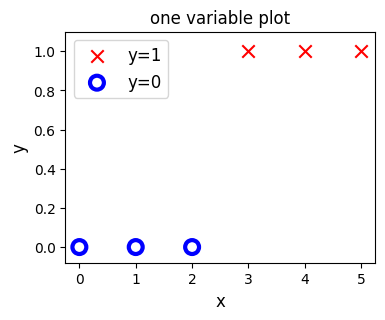

In [11]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors='blue',lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [ ]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

`model.summary()` shows the layers and number of parameters in the model.  
There is only one layer in this model and that layer has only one unit. The unit has two parameters, w and b.

In [ ]:
model.summary()

In [ ]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

In [ ]:
#set weights and bias to known values
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

### Making predictions

In [ ]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)